In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("scores_data.csv")
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [4]:
df.shape

(149, 3)

In [5]:
df.columns

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')

In [6]:
df.isnull().sum()

Batch          0
User_ID        0
   Score       0
dtype: int64

In [7]:
df.describe()

,Batch,User_ID,Score
count,149,149,149
unique,3,149,8
top,AI_ELITE_7,uid_149,4 / 7
freq,53,1,40


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.columns = df.columns.str.strip()

In [10]:
df['Score'].head(10)

0    6 / 7
1    6 / 7
2    7 / 7
3    7 / 7
4    4 / 7
5    7 / 7
6    5 / 7
7    7 / 7
8    3 / 7
9    6 / 7
Name: Score, dtype: object

In [11]:
df['Score'] = df['Score'].astype(str).str.split('/').str[0].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Batch    149 non-null    object
 1   User_ID  149 non-null    object
 2   Score    149 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.6+ KB


Mean

In [13]:
df['Score'].mean()

np.float64(4.382550335570469)

Median

In [14]:
df['Score'].median()

np.float64(4.0)

Mode

In [15]:
df['Score'].mode()

0    4
Name: Score, dtype: int64

In [16]:
df['Score'].describe()

count    149.000000
mean       4.382550
std        1.592199
min        0.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        7.000000
Name: Score, dtype: float64

Score Distribution

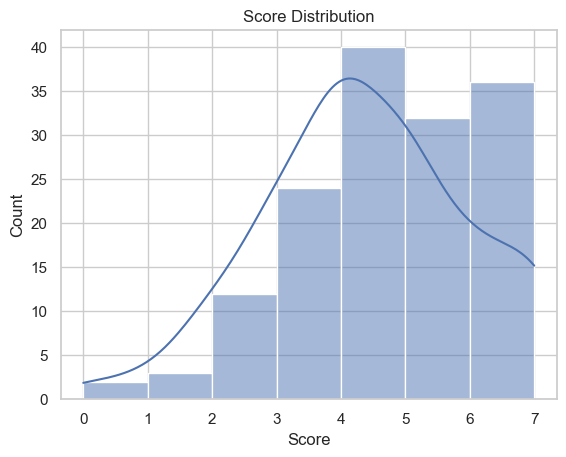

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Score'], bins=7, kde=True)
plt.title("Score Distribution")
plt.show()

Boxplot (Outliers)

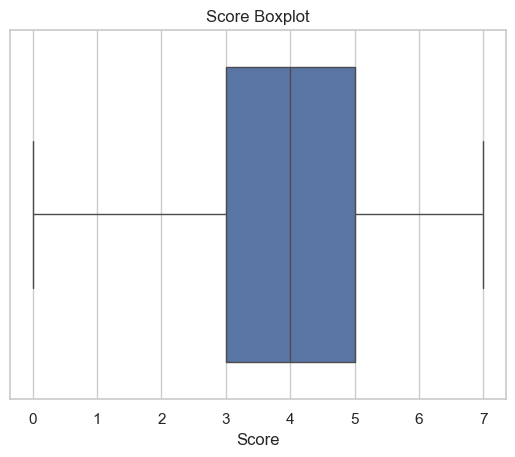

In [18]:
sns.boxplot(x=df['Score'])
plt.title("Score Boxplot")
plt.show()

In [19]:
df['Score'].value_counts().sort_index()

Score
0     2
1     3
2    12
3    24
4    40
5    32
6    18
7    18
Name: count, dtype: int64

Batch Frequency

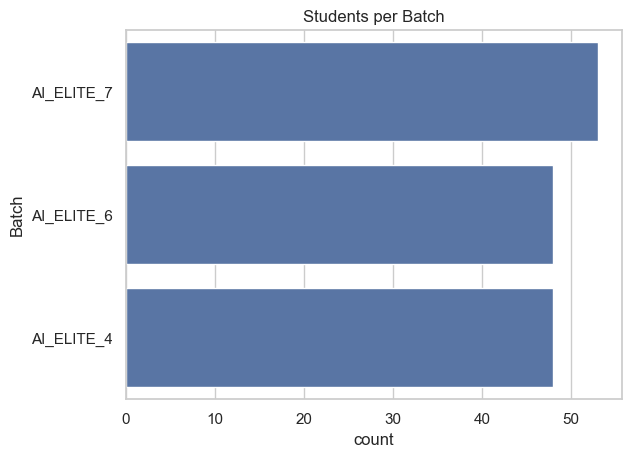

In [20]:
df['Batch'].value_counts()
sns.countplot(y=df['Batch'])
plt.title("Students per Batch")
plt.show()

Batch vs Score (Mean)

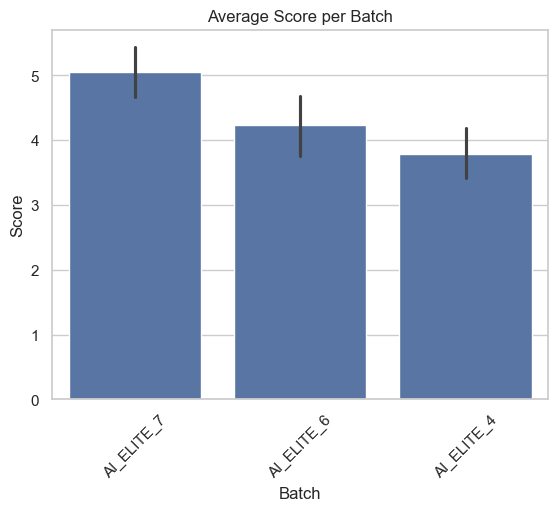

In [21]:
df.groupby('Batch')['Score'].mean()
sns.barplot(x='Batch', y='Score', data=df)
plt.xticks(rotation=45)
plt.title("Average Score per Batch")
plt.show()

Batch vs Score (Distribution)

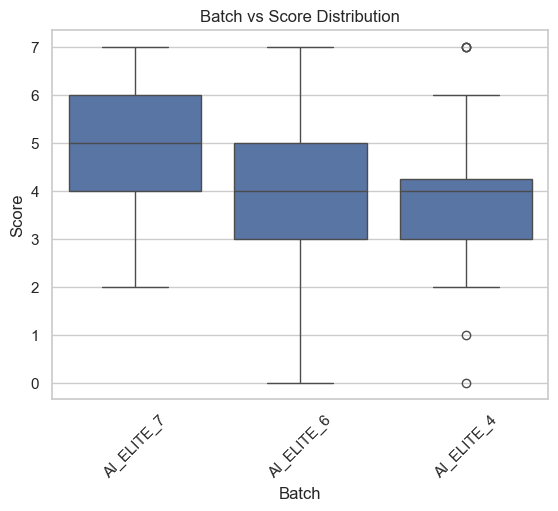

In [22]:
sns.boxplot(x='Batch', y='Score', data=df)
plt.xticks(rotation=45)
plt.title("Batch vs Score Distribution")
plt.show()

Score Category vs Batch

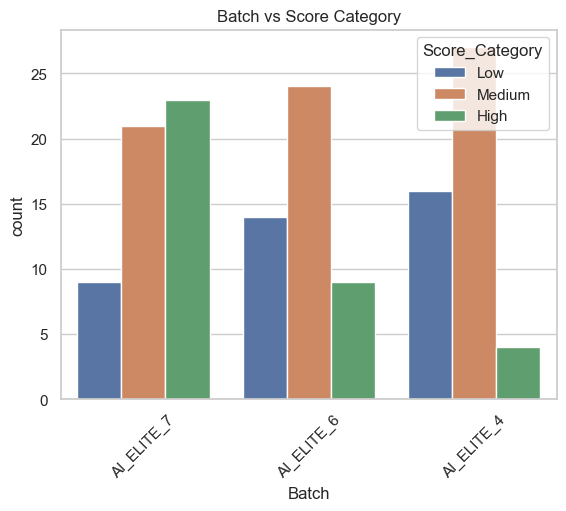

In [23]:
df['Score_Category'] = pd.cut(
    df['Score'],
    bins=[0,3,5,7],
    labels=['Low','Medium','High']
)

sns.countplot(x='Batch', hue='Score_Category', data=df)
plt.xticks(rotation=45)
plt.title("Batch vs Score Category")
plt.show()

Variance

In [24]:
df['Score'].var()

np.float64(2.5350988572465076)

Standard Deviation

In [25]:
df['Score'].std()

np.float64(1.5921993773540133)

Interquartile Range (IQR)

In [26]:
Q1 = df['Score'].quantile(0.25)
Q3 = df['Score'].quantile(0.75)
IQR = Q3 - Q1
IQR

np.float64(2.0)

Skewness

In [27]:
df['Score'].skew()

np.float64(-0.1797425271078158)